- Zaladuj plik Titanic_DataSet
- zapoznaj sie z danymi - co oznaczaj kolumny? jakie maja wartosci? czy sa zmiennymi kategorycznymi czy ciaglymi
- zamien PClass na zmienna kategoryczna
- jaka jest rozklad wieku w poszczegolnych klasach?
- jaka jest rozklad wieku w poszczegolnych plciach?
- jaka jest zaleznosc miedzy wiekiem a szansami na przetrwanie?
- jaka jest zaleznosc miedzy plcia z szansami na przetrwanie?
- jaka jest zaleznosc miedzy klasa a szansami na przetrwanie?


In [ ]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as pyplot

df = pandas.read_csv('Titanic-Dataset.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
col = 'Pclass'
# Mapujemy wartości liczbowe na opisowe
mapping = {1: 'Low', 2: 'Medium', 3: 'High'}
df[col] = df[col].map(mapping).astype('category')
# Ustawiamy uporządkowane kategorie
df[col] = pandas.Categorical(df[col], categories=['Low', 'Medium', 'High'], ordered=True)
print(f"Kolumna {col} została przekonwertowana na kategorię. Dtype: {df[col].dtype}")
print(df[col].value_counts(dropna=False))



Kolumna Pclass została przekonwertowana na kategorię. Dtype: category
Pclass
High      491
Low       216
Medium    184
Name: count, dtype: int64


In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,High,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Low,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,High,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Low,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,High,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


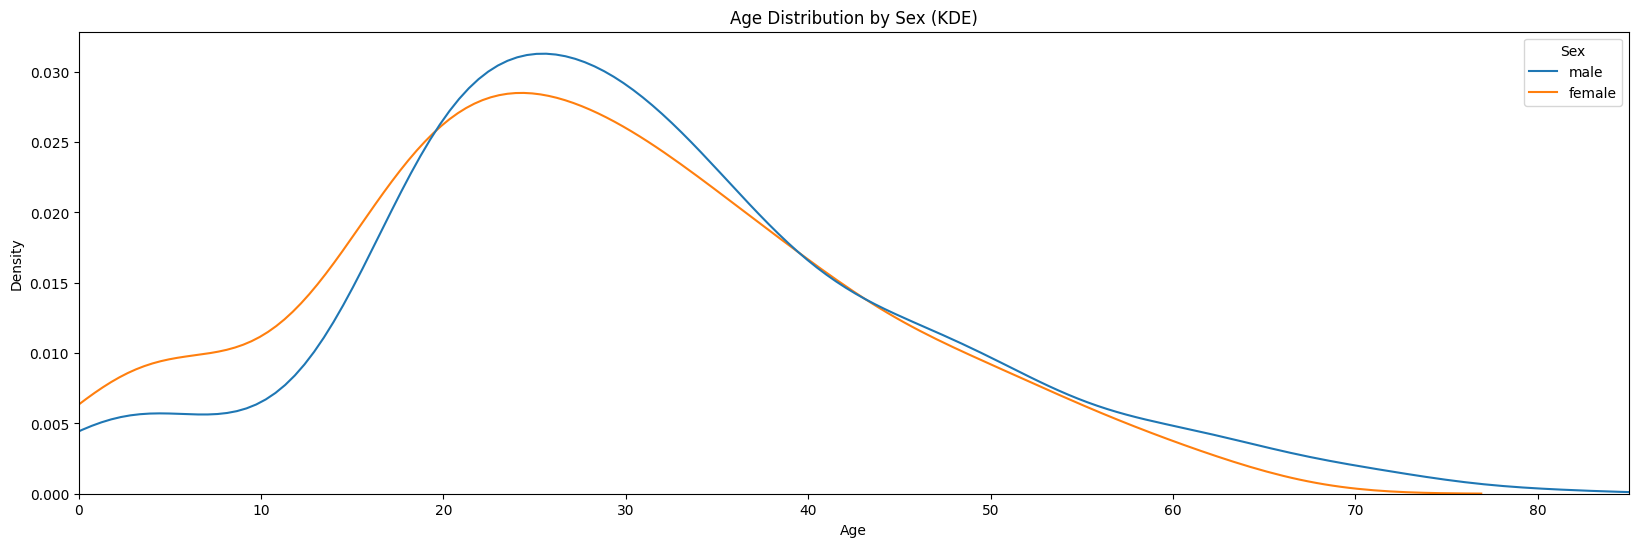

In [ ]:
# Line plot: Age distribution by Sex (KDE)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

age_col = 'Age'
sex_col = 'Sex'
plot_df = df.dropna(subset=[age_col, sex_col]).copy()
plt.figure(figsize=(20, 6))
sns.kdeplot(data=plot_df, x=age_col, hue=sex_col, common_norm=False)
plt.title('Age Distribution by Sex (KDE)')
plt.xlim(0, plot_df[age_col].max() + 5)
plt.show()


C:\Users\s1203137\AppData\Local\temp\ipykernel_4864\2241179734.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = plot_df.groupby([sex_col, 'AgeBin']).size().reset_index(name='count')


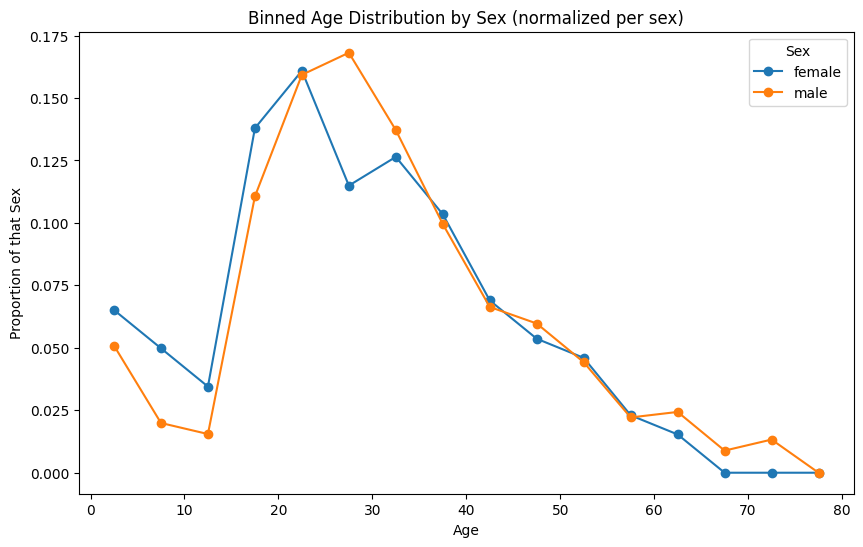

In [39]:
# Binned line plot: Age distribution by Sex (normalized counts)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create age bins (width 5 years)
max_age = int(plot_df[age_col].max())
bins = np.arange(0, max_age + 5, 5)
plot_df['AgeBin'] = pd.cut(plot_df[age_col], bins=bins, right=False)

# Count per sex per bin
age_counts = plot_df.groupby([sex_col, 'AgeBin']).size().reset_index(name='count')
# Pivot so columns are sexes and index is AgeBin
pivot = age_counts.pivot(index='AgeBin', columns=sex_col, values='count').fillna(0)
# Normalize columns so each sex sums to 1
pivot_norm = pivot.div(pivot.sum(axis=0), axis=1)

# Compute bin centers for plotting
bin_centers = [interval.left + (interval.right - interval.left) / 2 for interval in pivot_norm.index]

plt.figure(figsize=(10, 6))
for sex_val in pivot_norm.columns:
    plt.plot(bin_centers, pivot_norm[sex_val], marker='o', label=sex_val)

plt.xlabel('Age')
plt.ylabel('Proportion of that Sex')
plt.title('Binned Age Distribution by Sex (normalized per sex)')
plt.legend(title='Sex')
plt.show()


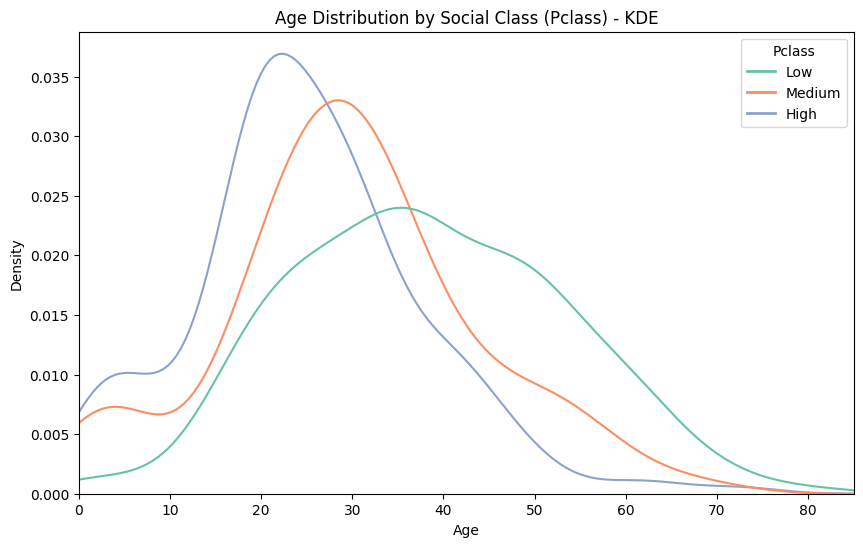

In [71]:
# KDE plot reusing existing variables (minimal code)
from matplotlib.lines import Line2D

plt.figure(figsize=(10, 6))
ax = sns.kdeplot(data=plot_df_cls, x=age_col, hue=pclass_col, common_norm=False, hue_order=hue_order, palette=palette, legend=False)

# Create explicit Line2D handles (no conditional logic)
handles = [Line2D([0], [0], color=palette[i], lw=2) for i in range(len(hue_order))]
ax.legend(handles=handles, labels=hue_order, title='Pclass')

plt.title('Age Distribution by Social Class (Pclass) - KDE')
plt.xlabel('Age')
plt.ylabel('Density')
plt.xlim(0, plot_df_cls[age_col].max() + 5)
plt.show()


C:\Users\s1203137\AppData\Local\temp\ipykernel_4864\4211788423.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = plot_df_cls.groupby([age_bins, pclass_col]).size().unstack(fill_value=0)


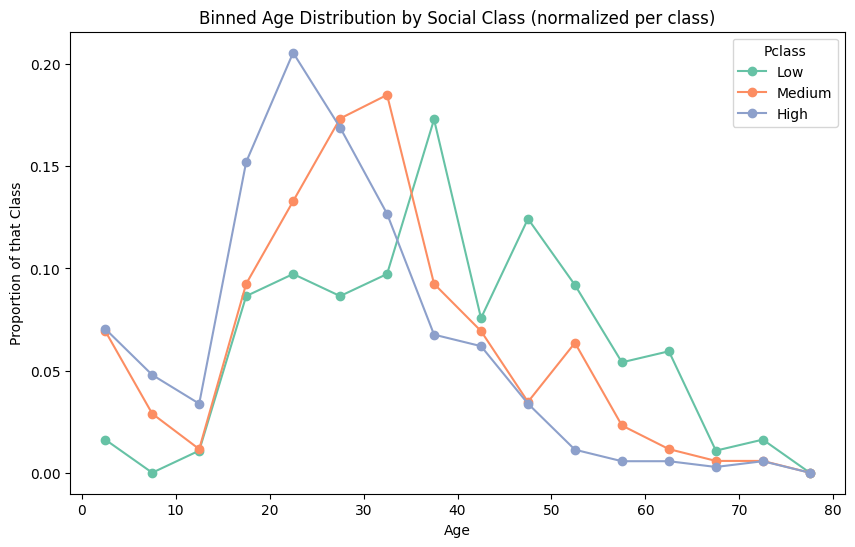

In [73]:
# Simplified binned line plot using shared variables
# Create 5-year age bins and compute normalized counts per class
bins = np.arange(0, int(plot_df_cls[age_col].max()) + 5, 5)
age_bins = pd.cut(plot_df_cls[age_col], bins=bins, right=False)

counts = plot_df_cls.groupby([age_bins, pclass_col]).size().unstack(fill_value=0)
counts = counts.reindex(columns=hue_order, fill_value=0)
counts_norm = counts.div(counts.sum(axis=0).replace(0, 1), axis=1)

centers = [interval.left + (interval.right - interval.left)/2 for interval in counts_norm.index]

plt.figure(figsize=(10, 6))
for i, cls_val in enumerate(counts_norm.columns):
    plt.plot(centers, counts_norm[cls_val], marker='o', color=palette[i], label=cls_val)

plt.xlabel('Age')
plt.ylabel('Proportion of that Class')
plt.title('Binned Age Distribution by Social Class (normalized per class)')
plt.legend(title='Pclass')
plt.show()


In [68]:
# Debug: show categories used for Pclass plotting
print('Pclass categories:', list(df['Pclass'].cat.categories))
print(df['Pclass'].value_counts())


Pclass categories: ['Low', 'Medium', 'High']
Pclass
High      491
Low       216
Medium    184
Name: count, dtype: int64
